# ID3 algorithm
### Defining data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import math
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

In [2]:
data = pd.read_csv('ID3sampledata.csv',index_col=0)
data['Y'].to_string()
data['Y'] = data['Y'].replace(to_replace = [0,1],value = ['zero','one'])
data

FileNotFoundError: File b'ID3sampledata.csv' does not exist

In [3]:
data = pd.DataFrame()
#data['Day'] = pd.Series(range(1,15,1))
data['Outlook'] = pd.Series(['Sunny','Sunny','Overcast','Rain','Rain','Rain','Overcast','Sunny','Sunny','Rain','Sunny','Overcast','Overcast','Rain'])
data['Temp'] = pd.Series(['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild'])
data['Humidity'] = pd.Series(['High','High','High','High','Normal','Normal','Normal','High','Normal','Normal','Normal','High','Normal','High'])
data['Wind'] = pd.Series(['Weak','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Strong'])
data['Decision'] = pd.Series(['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No'])
data

,Outlook,Temp,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
# function to get a dictionary of attribtues in a dataset (excepting the classification data column) as keys mapped to  
# their possible values
def get_attsets(data,Y='Y'):
    attsetskey = list(data.columns)
    attsetskey.remove(Y)
    #print(attsetskey)
    attsetsvalue = [list(data[i].unique()) for i in attsetskey]
    attsets = dict(zip(attsetskey,attsetsvalue))
    attsetscopy = dict()
    for (key,values) in attsets.items():
        if len(values)>1:
            attsetscopy[key] = values
    return attsetscopy


In [223]:
attsets = get_attsets(data,Y='Y')
print(attsets)


{'0': ['p', 'y', 'v'], '1': ['p', 'w', 'k'], '2': ['a', 'd', 'm']}


In [224]:
# Function to calculate entropy of a dataset
def calc_H(subdata,Y = 'Y'):
    p = subdata[Y].value_counts()/len(subdata[Y])
    plogp = pd.Series(-i*math.log(i,2) for i in p)
    H = plogp.sum()
    return H

In [39]:
# functions to calculate Information gain, and to get the max information gain attribute from a dataset
import math
def IG(subdata,att,values,HS, Y = 'Y'):
    m = subdata[str(att)].value_counts()/len(subdata[str(att)]) 
    #print('Proportion in each value of attribute ',att)
    #print(m)
    Hatt = dict()
    matt = dict()
    mHatt = dict()
    for k in values:
        subdata1 = subdata[subdata[str(att)]==k]
        #print('Attribute: ',att,'   Value: ',k)
        Hatt[k] = calc_H(subdata1)
        #print('Entropy of ',k,Hatt[k])
        #print(m[k])
        mHatt[k] = m[k]*Hatt[k]
        #print(mHatt[k])
    return (HS - sum([v for (k,v) in mHatt.items()]))
def get_maxIG_att(subdata,HS,Y='Y'):
    maxIG = 0
    maxIGatt = ''
    #print('HS = ',HS)
    attIGdict = dict()
    attsets = get_attsets(subdata,Y)
    for att in attsets:
        currentIG = IG(subdata,att,attsets[att],HS,Y='Y')
        if currentIG>maxIG:
            maxIG = currentIG
            maxIGatt= att
    return (maxIGatt,maxIG)    

In [40]:
#IG(data,'Humidity',get_attsets(data,'Decision')['Humidity'],calc_H(data,Y='Decision'),'Decision')
HS = calc_H(data,'Decision')
get_maxIG_att(data,HS,'Decision')

('Outlook', 0.2467498197744391)

In [14]:
# function to subset data
def get_subdata(data1,att,value):
    return data1[data[att]==value]

In [236]:
import networkx as nx
del(G)
G = nx.DiGraph()
open_branches = []
Y = 'Y'
currentnode = 0
nodenum = 1
currentdata = data
G.add_node(currentnode)
open_branches.append(currentnode)
uniquevals = list(data[Y].unique())
for i in uniquevals:
    G.add_node(i)


In [237]:
all_branches_done = 0
while all_branches_done==0:
    print('Currentnode: ',currentnode)
    HS = calc_H(currentdata,Y)
    print('Entropy: ',HS)
    maxIGatt = []
    maxIG = []
    if HS>0:
        print('Getting max IG attribute')
        IGatttup = get_maxIG_att(currentdata,HS,Y)
        maxIGatt = IGatttup[0]
        maxIG = IGatttup[1]
        print('Max IG attribute is: ',maxIGatt,maxIG)
        # calculating values present in current subset of dataset for max IG att
        values = get_attsets(currentdata,Y)[maxIGatt]
        for v in values:
            # adding branches for each value of max IG attribute
            G.add_edge(currentnode,nodenum)
            open_branches.append(nodenum)
            G.nodes[nodenum]['att'] = maxIGatt
            G.nodes[nodenum]['value'] = v
            nodenum = nodenum+1
        open_branches.remove(currentnode)
        print('Added nodes: ',list(G.successors(currentnode)))
    else:
        print('Reached entropy = 0 on one branch')
        uniquevalue = list(currentdata[Y].unique())[0]
        G.add_edge(currentnode,uniquevalue)
        open_branches.remove(currentnode)
#         pred = list(G.predecessors(currentnode))[0]
#         currentnode = pred
#         print('Going up one node to ',currentnode)
#         while (len(open_branches)==0):
#         open_branches = [i for i in list(G.successors(currentnode)) if not(any([nx.has_path(G,currentnode,v) for v in uniquevals]))]
#         print('Successors are: ',list(G.successors(currentnode)))
#         print('Open branches are: ',open_branches)
#     open_branches = [i for i in list(G.successors(currentnode)) if not(any([nx.has_path(G,currentnode,v) for v in uniquevals]))]
#     currentnode = open_branches[0]
    # travesing to an open branch
    if len(open_branches)>0:
        currentnode = open_branches[0]
        print('Next current node = ',currentnode)
        path = list(nx.all_simple_paths(G,0,currentnode))[0][1:]
        print('Path to current node',currentnode,path)
        currentdata = data
        for p in path:
            currentdata = get_subdata(currentdata,G.nodes[p]['att'],G.nodes[p]['value']).copy()
        print(currentdata)
    else:
        all_branches_done = 1

Currentnode:  0
Entropy:  0.9182958340544896
Getting max IG attribute
Max IG attribute is:  2 0.11408575783170383
Added nodes:  [1, 2, 3]
Next current node =  1
Path to current node 1 [1]
    0  1  2  Y
0   p  p  a  0
3   p  w  a  0
6   p  k  a  0
9   y  p  a  1
12  y  w  a  0
15  y  k  a  1
18  v  p  a  1
21  v  w  a  1
24  v  k  a  0
Currentnode:  1
Entropy:  0.9910760598382222
Getting max IG attribute
Max IG attribute is:  0 0.3788788371352292
Added nodes:  [4, 5, 6]
Next current node =  2
Path to current node 2 [2]
    0  1  2  Y
1   p  p  d  0
4   p  w  d  1
7   p  k  d  1
10  y  p  d  0
13  y  w  d  0
16  y  k  d  1
19  v  p  d  1
22  v  w  d  1
25  v  k  d  1
Currentnode:  2
Entropy:  0.9182958340544896
Getting max IG attribute
Max IG attribute is:  0 0.3060986113514965
Added nodes:  [7, 8, 9]
Next current node =  3
Path to current node 3 [3]
    0  1  2  Y
2   p  p  m  1
5   p  w  m  1
8   p  k  m  1
11  y  p  m  1
14  y  w  m  1
17  y  k  m  1
20  v  p  m  1
23  v  w  m  0
26 

C:\Users\Arati\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until



Currentnode:  13
Entropy:  0.0
Reached entropy = 0 on one branch
Next current node =  14
Path to current node 14 [1, 5, 14]
    0  1  2  Y
12  y  w  a  0
Currentnode:  14
Entropy:  0.0
Reached entropy = 0 on one branch
Next current node =  15
Path to current node 15 [1, 5, 15]
    0  1  2  Y
15  y  k  a  1
Currentnode:  15
Entropy:  0.0
Reached entropy = 0 on one branch
Next current node =  16
Path to current node 16 [1, 6, 16]
    0  1  2  Y
18  v  p  a  1
Currentnode:  16
Entropy:  0.0
Reached entropy = 0 on one branch
Next current node =  17
Path to current node 17 [1, 6, 17]
    0  1  2  Y
21  v  w  a  1
Currentnode:  17
Entropy:  0.0
Reached entropy = 0 on one branch
Next current node =  18
Path to current node 18 [1, 6, 18]
    0  1  2  Y
24  v  k  a  0
Currentnode:  18
Entropy:  0.0
Reached entropy = 0 on one branch
Next current node =  19
Path to current node 19 [2, 7, 19]
   0  1  2  Y
1  p  p  d  0
Currentnode:  19
Entropy:  0.0
Reached entropy = 0 on one branch
Next current

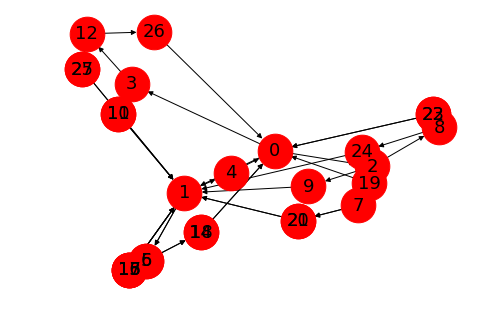

In [238]:
nx.draw_spectral(G,with_labels=True, font_size=18,node_size=1200)

In [187]:
allpaths = list(nx.all_simple_paths(G,0,'No'))
print('Rule for ','No',':')
print('If')
for path in allpaths:
    for p in path[1:len(path)-2]:
        print('( ',G.nodes[p]['att'],'=',G.nodes[p]['value'], ' ) and ',end="")
    print('( ',G.nodes[path[len(path)-2]]['att'],'=',G.nodes[path[len(path)-2]]['value'], ' )',end="")
    if path==allpaths[len(allpaths)-1]:
        break
    else:
        print('\n','Or')    
    


Rule for  No :
If
(  Outlook = Sunny  ) and (  Humidity = High  )
 Or
(  Outlook = Rain  ) and (  Wind = Strong  )

In [207]:
def print_rule_string(G,decisionval):
    allpaths = list(nx.all_simple_paths(G,0,decisionval))
    print('Rule for ',decisionval,':')
    print('If')
    for path in allpaths:
        for p in path[1:len(path)-2]:
            print('( ',G.nodes[p]['att'],'=',G.nodes[p]['value'], ' ) And ',end="")
        print('( ',G.nodes[path[len(path)-2]]['att'],'=',G.nodes[path[len(path)-2]]['value'], ' )',end="")
        if path==allpaths[len(allpaths)-1]:
            print('\n')
            break
        else:
            print('\n','Or')    

In [208]:
print_rule_string(G,'Yes')
print_rule_string(G,'No')

Rule for  Yes :
If
(  Outlook = Sunny  ) And (  Humidity = Normal  )
 Or
(  Outlook = Overcast  )
 Or
(  Outlook = Rain  ) And (  Wind = Weak  )

Rule for  No :
If
(  Outlook = Sunny  ) And (  Humidity = High  )
 Or
(  Outlook = Rain  ) And (  Wind = Strong  )



In [244]:
def ID3(data,Y='Y'):
    G = nx.DiGraph()
    open_branches = []
    currentnode = 0
    nodenum = 1
    currentdata = data
    G.add_node(currentnode)
    open_branches.append(currentnode)
    uniquevals = list(data[Y].unique())
    for i in uniquevals:
        G.add_node(i)
    all_branches_done = 0
    while all_branches_done==0:
        #print('Currentnode: ',currentnode)
        HS = calc_H(currentdata,Y)
        #print('Entropy: ',HS)
        maxIGatt = []
        maxIG = []
        if HS>0:
            #print('Getting max IG attribute')
            IGatttup = get_maxIG_att(currentdata,HS,Y)
            maxIGatt = IGatttup[0]
            maxIG = IGatttup[1]
            #print('Max IG attribute is: ',maxIGatt,maxIG)
            # calculating values present in current subset of dataset for max IG att
            values = get_attsets(currentdata,Y)[maxIGatt]
            for v in values:
                # adding branches for each value of max IG attribute
                G.add_edge(currentnode,nodenum)
                open_branches.append(nodenum)
                G.nodes[nodenum]['att'] = maxIGatt
                G.nodes[nodenum]['value'] = v
                nodenum = nodenum+1
            open_branches.remove(currentnode)
            #print('Added nodes: ',list(G.successors(currentnode)))
        else:
            #print('Reached entropy = 0 on one branch')
            uniquevalue = list(currentdata[Y].unique())[0]
            G.add_edge(currentnode,uniquevalue)
            open_branches.remove(currentnode)
        if len(open_branches)>0:
            currentnode = open_branches[0]
            #print('Next current node = ',currentnode)
            path = list(nx.all_simple_paths(G,0,currentnode))[0][1:]
            print('Path to current node',currentnode,path)
            currentdata = data
            for p in path:
                currentdata = get_subdata(currentdata,G.nodes[p]['att'],G.nodes[p]['value']).copy()
            print(currentdata)
        else:
            all_branches_done = 1    
    for uv in uniquevals:
        print_rule_string(G,uv)

In [245]:
ID3(data,'Y')

Path to current node 1 [1]
    0  1  2     Y
0   p  p  a  zero
3   p  w  a  zero
6   p  k  a  zero
9   y  p  a   one
12  y  w  a  zero
15  y  k  a   one
18  v  p  a   one
21  v  w  a   one
24  v  k  a  zero
Path to current node 2 [2]
    0  1  2     Y
1   p  p  d  zero
4   p  w  d   one
7   p  k  d   one
10  y  p  d  zero
13  y  w  d  zero
16  y  k  d   one
19  v  p  d   one
22  v  w  d   one
25  v  k  d   one
Path to current node 3 [3]
    0  1  2     Y
2   p  p  m   one
5   p  w  m   one
8   p  k  m   one
11  y  p  m   one
14  y  w  m   one
17  y  k  m   one
20  v  p  m   one
23  v  w  m  zero
26  v  k  m   one
Path to current node 4 [1, 4]
   0  1  2     Y
0  p  p  a  zero
3  p  w  a  zero
6  p  k  a  zero
Path to current node 5 [1, 5]
    0  1  2     Y
9   y  p  a   one
12  y  w  a  zero
15  y  k  a   one
Path to current node 6 [1, 6]
    0  1  2     Y
18  v  p  a   one
21  v  w  a   one
24  v  k  a  zero
Path to current node 7 [2, 7]
   0  1  2     Y
1  p  p  d  zero
4  p  w  d   

C:\Users\Arati\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


 18 [1, 6, 18]
    0  1  2     Y
24  v  k  a  zero
Path to current node 19 [2, 7, 19]
   0  1  2     Y
1  p  p  d  zero
Path to current node 20 [2, 7, 20]
   0  1  2    Y
4  p  w  d  one
Path to current node 21 [2, 7, 21]
   0  1  2    Y
7  p  k  d  one
Path to current node 22 [2, 8, 22]
    0  1  2     Y
10  y  p  d  zero
Path to current node 23 [2, 8, 23]
    0  1  2     Y
13  y  w  d  zero
Path to current node 24 [2, 8, 24]
    0  1  2    Y
16  y  k  d  one
Path to current node 25 [3, 12, 25]
    0  1  2    Y
20  v  p  m  one
Path to current node 26 [3, 12, 26]
    0  1  2     Y
23  v  w  m  zero
Path to current node 27 [3, 12, 27]
    0  1  2    Y
26  v  k  m  one
Rule for  zero :
If
(  2 = a  ) And (  0 = p  )
 Or
(  2 = a  ) And (  0 = y  ) And (  1 = w  )
 Or
(  2 = a  ) And (  0 = v  ) And (  1 = k  )
 Or
(  2 = d  ) And (  0 = p  ) And (  1 = p  )
 Or
(  2 = d  ) And (  0 = y  ) And (  1 = p  )
 Or
(  2 = d  ) And (  0 = y  ) And (  1 = w  )
 Or
(  2 = m  ) And (  0 = v  ) And

In [235]:
G.nodes.data()

NodeDataView({0: {}, 'No': {}, 'Yes': {}, 1: {'att': 'Outlook', 'value': 'Sunny'}, 2: {'att': 'Outlook', 'value': 'Overcast'}, 3: {'att': 'Outlook', 'value': 'Rain'}, 4: {'att': 'Humidity', 'value': 'High'}, 5: {'att': 'Humidity', 'value': 'Normal'}, 6: {'att': 'Wind', 'value': 'Weak'}, 7: {'att': 'Wind', 'value': 'Strong'}})